In [34]:
import sqlite3
import pandas
import matplotlib.pyplot as plt

In [15]:
pandas.set_option('display.max_rows', 500)

In [16]:
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

## Part 1: Wrangling
### Problem 1

In [17]:
stats_query = "SELECT teamID, yearID, franchID, W, G, (W * 1.0) / (G * 1.0) * 100 as win_percentage FROM Teams"
team_stats = pandas.read_sql(stats_query, conn)
team_stats

,teamID,yearID,franchID,W,G,win_percentage
0,BS1,1871,BNA,20,31,64.516129
1,CH1,1871,CNA,19,28,67.857143
2,CL1,1871,CFC,10,29,34.482759
3,FW1,1871,KEK,7,19,36.842105
4,NY2,1871,NNA,16,33,48.484848
...,...,...,...,...,...,...
2770,PIT,2014,PIT,88,162,54.320988
2771,SDN,2014,SDP,77,162,47.530864
2772,SFN,2014,SFG,88,162,54.320988
2773,SLN,2014,STL,90,162,55.555556


In [18]:
salary_query = "SELECT yearID, teamID, salary  FROM Salaries"

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries

,yearID,teamID,salary
0,1985,ATL,870000.0
1,1985,ATL,550000.0
2,1985,ATL,545000.0
3,1985,ATL,633333.0
4,1985,ATL,625000.0
...,...,...,...
24753,2014,WAS,3450000.0
24754,2014,WAS,3975000.0
24755,2014,WAS,20000000.0
24756,2014,WAS,7500000.0


Relation containing: total payroll, winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination), franchise ids, number of wins, number of games).

In [19]:
relation_query = '''WITH total_payroll as 
                    (SELECT teamID, 
                            yearID, 
                            sum(salary) as payroll 
                    FROM Salaries GROUP BY teamID, yearID)
                    SELECT Teams.teamID,
                        Teams.yearID,
                        Teams.lgID,
                        payroll,
                        franchID,
                        rank, 
                        W,
                        G, 
                        ((W * 1.0 / G * 1.0) * 100) as win_percentage
                    FROM total_payroll, Teams
                    WHERE total_payroll.yearID = Teams.yearID and
                    total_payroll.teamID = Teams.teamID'''
relation = pandas.read_sql(relation_query, conn)


In [20]:
relation.head()

,teamID,yearID,lgID,payroll,franchID,Rank,W,G,win_percentage
0,ATL,1985,NL,14807000.0,ATL,5,66,162,40.740741
1,BAL,1985,AL,11560712.0,BAL,4,83,161,51.552795
2,BOS,1985,AL,10897560.0,BOS,5,81,163,49.693252
3,CAL,1985,AL,14427894.0,ANA,2,90,162,55.555556
4,CHA,1985,AL,9846178.0,CHW,3,85,163,52.147239


In [21]:
relation[relation.teamID == 'WAS']

,teamID,yearID,lgID,payroll,franchID,Rank,W,G,win_percentage
587,WAS,2005,NL,48581500.0,WSN,5,81,162,50.000000
617,WAS,2006,NL,63143000.0,WSN,5,71,162,43.827160
647,WAS,2007,NL,36947500.0,WSN,4,73,162,45.061728
677,WAS,2008,NL,54961000.0,WSN,5,59,161,36.645963
707,WAS,2009,NL,59928000.0,WSN,5,59,162,36.419753
737,WAS,2010,NL,61400000.0,WSN,5,69,162,42.592593
767,WAS,2011,NL,63856928.0,WSN,3,80,161,49.689441
797,WAS,2012,NL,80855143.0,WSN,1,98,162,60.493827
827,WAS,2013,NL,113703270.0,WSN,2,86,162,53.086420
857,WAS,2014,NL,131983680.0,WSN,1,96,162,59.259259


#### Missing data: 
Teams starts from the year 1871, whereas Salaries starts from 1985.

In [22]:
relation['teamID'].unique()

array(['ATL', 'BAL', 'BOS', 'CAL', 'CHA', 'CHN', 'CIN', 'CLE', 'DET',
       'HOU', 'KCA', 'LAN', 'MIN', 'ML4', 'MON', 'NYA', 'NYN', 'OAK',
       'PHI', 'PIT', 'SDN', 'SEA', 'SFN', 'SLN', 'TEX', 'TOR', 'COL',
       'FLO', 'ANA', 'ARI', 'MIL', 'TBA', 'LAA', 'WAS', 'MIA'],
      dtype=object)

In [23]:
relation2_query = '''SELECT Salaries.teamID, Salaries.yearID, Salaries.salary as payroll 
                    FROM Salaries
                    LEFT JOIN Teams ON Salaries.teamID = Teams.teamID'''
relation2 = pandas.read_sql(relation2_query, conn)

In [24]:
relation2

,teamID,yearID,payroll
0,ATL,1985,870000.0
1,ATL,1985,870000.0
2,ATL,1985,870000.0
3,ATL,1985,870000.0
4,ATL,1985,870000.0
...,...,...,...
1710933,WAS,2014,14000000.0
1710934,WAS,2014,14000000.0
1710935,WAS,2014,14000000.0
1710936,WAS,2014,14000000.0


In [61]:
relation = relation[relation["yearID"] >= 1990]

## Part 2: Exploratory Data Analysis
### Problem 2
Distribution of payrolls across teams conditioned on time:

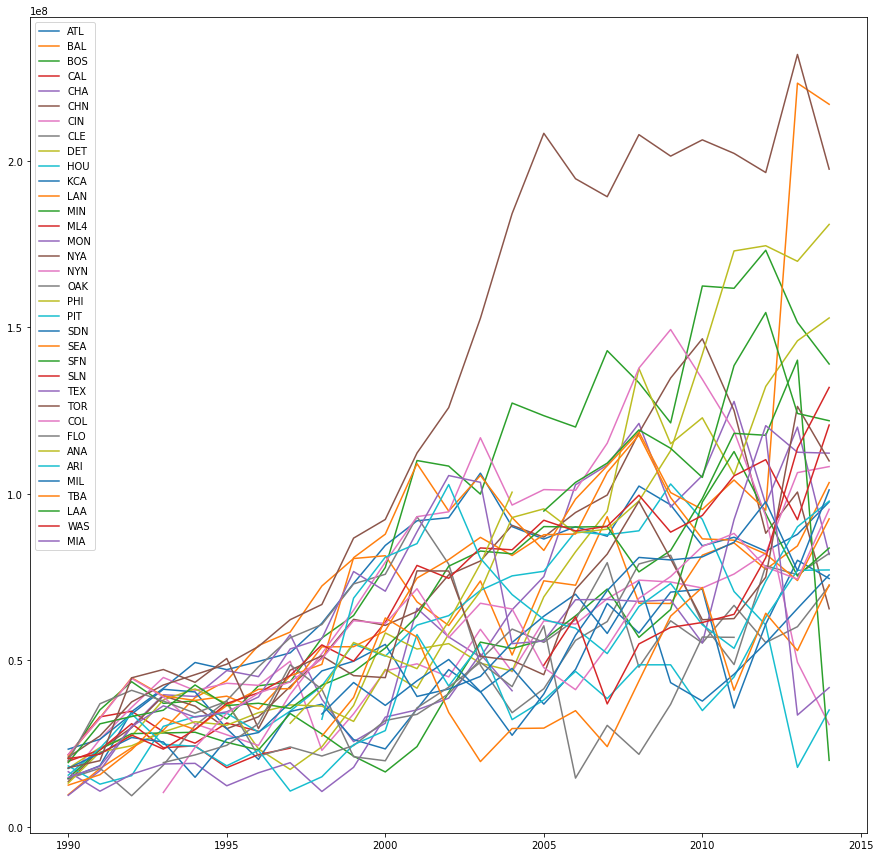

In [62]:
plt.figure(figsize=(15,15))
for team in relation["teamID"].unique():
    plt.plot(relation[relation.teamID == team]["yearID"],relation[relation.teamID == team]["payroll"], label = team)
    plt.legend()

Total payroll vs win percentage:

<AxesSubplot:xlabel='payroll', ylabel='win_percentage'>

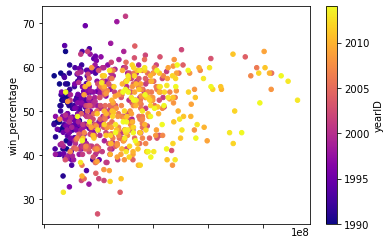

In [63]:
relation.plot.scatter(x = "payroll", y = "win_percentage", c="yearID", cmap="plasma")

### Question 1
What statements can you make about the distribution of payrolls conditioned on time based on these plots? Remember you can make statements in terms of central tendency, spread, and other statistics discussed in class.

### Problem 3

### Problem 4

In [67]:
#scatter plot showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods.
pandas.cut(x = relation["yearID"], bins = 5, retbins=True)

(130    (1989.976, 1994.8]
 131    (1989.976, 1994.8]
 132    (1989.976, 1994.8]
 133    (1989.976, 1994.8]
 134    (1989.976, 1994.8]
               ...        
 853      (2009.2, 2014.0]
 854      (2009.2, 2014.0]
 855      (2009.2, 2014.0]
 856      (2009.2, 2014.0]
 857      (2009.2, 2014.0]
 Name: yearID, Length: 728, dtype: category
 Categories (5, interval[float64, right]): [(1989.976, 1994.8] < (1994.8, 1999.6] < (1999.6, 2004.4] < (2004.4, 2009.2] < (2009.2, 2014.0]],
 array([1989.976, 1994.8  , 1999.6  , 2004.4  , 2009.2  , 2014.   ]))

In [81]:
out = pandas.cut(x = relation["yearID"], bins = 5)
#relation.plot.scatter(x = payroll.mean(), y = win_percentage.mean(), c="yearID", cmap="plasma")

ax = out.value_counts(sort=False).plot.bar(x = payroll, y=win_percentage, cmap="plasma", figsize=(10,10)) 
ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

NameError: name 'payroll' is not defined

### Question 2
What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A’s spending efficiency across these time periods and specifically in the Moneyball period of 2000-2005.

## Part 3: Data Transformations
### Problem 5